In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000



# Data PreProcessing


### Data Visualization

In [3]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
features =['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']
X = dataset[features]
Y = dataset['stroke']

In [6]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


<AxesSubplot:xlabel='stroke', ylabel='count'>

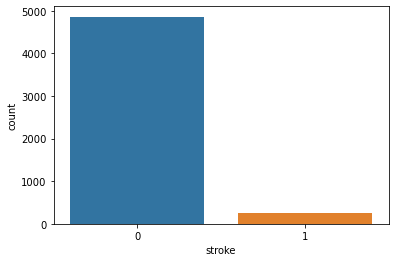

In [7]:
sns.countplot(x="stroke",data=dataset)

<AxesSubplot:xlabel='gender', ylabel='count'>

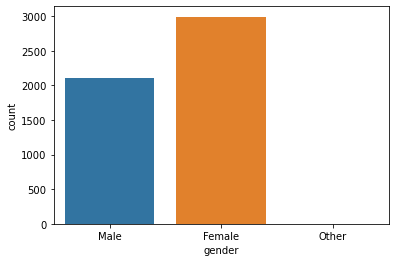

In [8]:
sns.countplot(x="gender",data=dataset)

<AxesSubplot:xlabel='hypertension', ylabel='count'>

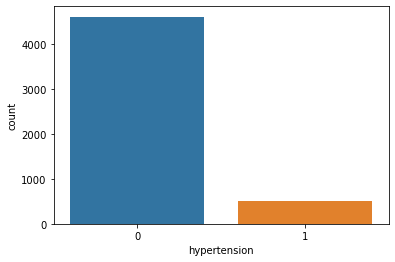

In [9]:
sns.countplot(x="hypertension",data=dataset)

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

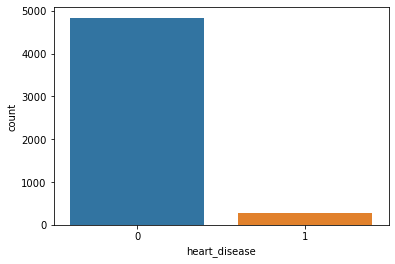

In [10]:
sns.countplot(x="heart_disease",data=dataset)

<AxesSubplot:xlabel='ever_married', ylabel='count'>

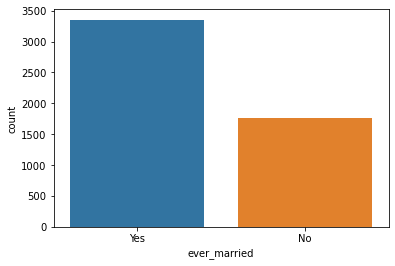

In [11]:
sns.countplot(x="ever_married",data=dataset)

<AxesSubplot:xlabel='work_type', ylabel='count'>

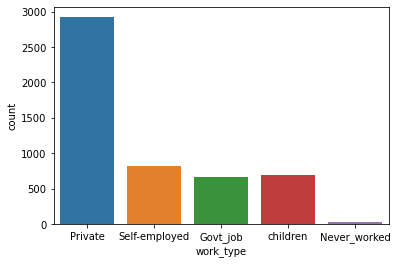

In [12]:
sns.countplot(x="work_type",data=dataset)

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

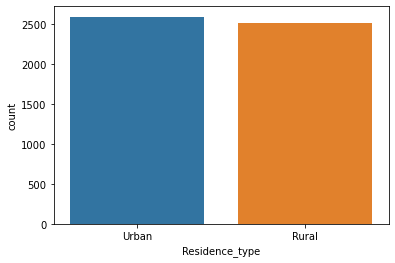

In [13]:
sns.countplot(x="Residence_type",data=dataset)

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

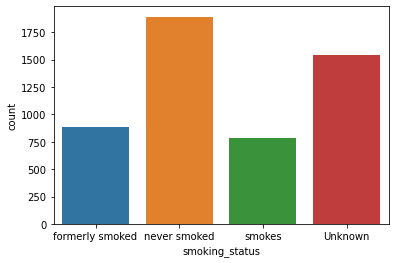

In [14]:
sns.countplot(x="smoking_status",data=dataset)

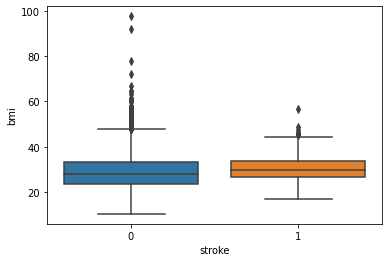

In [15]:
ax = sns.boxplot(x="stroke", y="bmi", data=dataset)

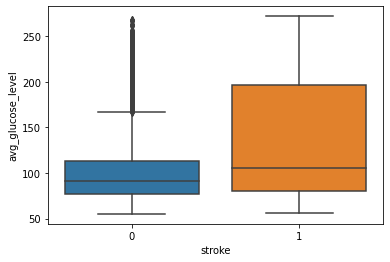

In [16]:
ax = sns.boxplot(x="stroke", y="avg_glucose_level", data=dataset)

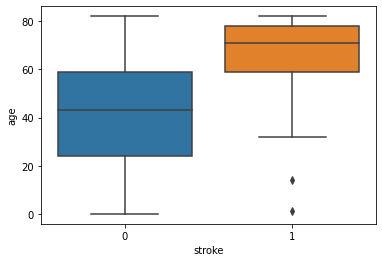

In [17]:
ax = sns.boxplot(x="stroke", y="age", data=dataset)

### Treating NaN, null Values

In [18]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [19]:
# Replacing Null Numeric vals

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imputer.fit(X.iloc[:,8:9])
X.iloc[:,8:9] = imputer.transform(X.iloc[:,8:9])
print(X.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


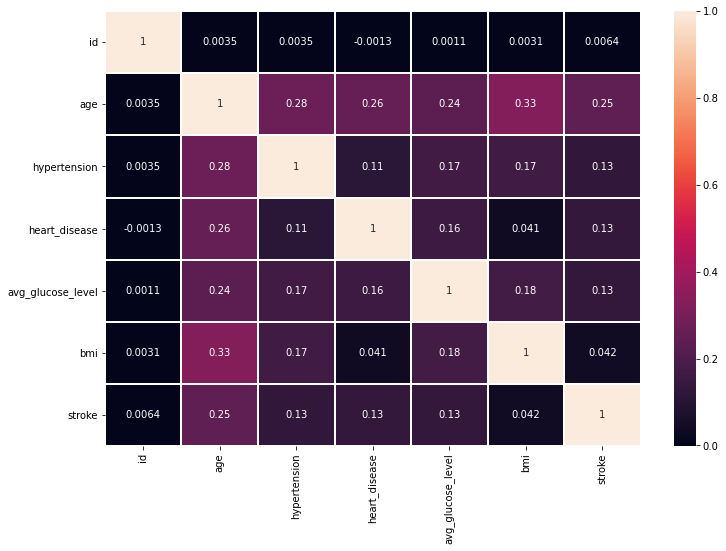

In [20]:
# dropping the rows having NaN values 
# df = pd.DataFrame(X)   
# df = df.dropna()   
# print(df)
plt.figure(figsize = (12, 8))
sns.heatmap(dataset.corr(), linecolor = 'white', linewidths = 1, annot = True)
plt.show()

In [21]:
X['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [22]:
# from sklearn.utils import resample

# train_data = pd.concat([X, Y], axis=1)
# # separate minority and majority classes
# negative = train_data[train_data.stroke==0]
# positive = train_data[train_data.stroke==1]
# # upsample minority
# pos_upsampled = resample(positive,
#  replace=True, # sample with replacement
#  n_samples=len(negative), # match number in majority class
#  random_state=27) # reproducible results
# # combine majority and upsampled minority
# upsampled = pd.concat([negative, pos_upsampled])
# # check new class counts
# upsampled.stroke.value_counts()

In [23]:
# X = upsampled.iloc[:, 0:10]
# Y = upsampled.iloc[:,10:11]
# del X_train['stroke']
print(X,Y)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level        bmi  

### Treating Categorical Variables


In [24]:
X.dtypes
Categorical_cols = ['gender','ever_married','work_type','Residence_type','smoking_status']
for col in Categorical_cols:
    print('Column Name: ' +col)
    print(X[col].value_counts())

Column Name: gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Column Name: ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64
Column Name: work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Column Name: Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
Column Name: smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [25]:
# Treating Independent Varibles


# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')
# df = np.array(ct.fit_transform(df))

                    #OR

from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_encoded = pd.DataFrame(OH_encoder.fit_transform(X[Categorical_cols]))

# One-hot encoding removed index; put it back
X_encoded.index = X.index

# Remove categorical columns (will replace with one-hot encoding)
num_X = X.drop(Categorical_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X = pd.concat([num_X, X_encoded], axis=1)

In [26]:
print(OH_X)

       age  hypertension  heart_disease  avg_glucose_level        bmi    0  \
0     67.0             0              1             228.69  36.600000  0.0   
1     61.0             0              0             202.21  28.893237  1.0   
2     80.0             0              1             105.92  32.500000  0.0   
3     49.0             0              0             171.23  34.400000  1.0   
4     79.0             1              0             174.12  24.000000  1.0   
...    ...           ...            ...                ...        ...  ...   
5105  80.0             1              0              83.75  28.893237  1.0   
5106  81.0             0              0             125.20  40.000000  1.0   
5107  35.0             0              0              82.99  30.600000  1.0   
5108  51.0             0              0             166.29  25.600000  0.0   
5109  44.0             0              0              85.28  26.200000  1.0   

        1    2    3    4  ...    6    7    8    9   10   11   1

In [27]:
OH_X.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,0,1,2,3,4,...,6,7,8,9,10,11,12,13,14,15
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,...,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.585910,0.413894,0.000196,0.343836,0.656164,...,0.004305,0.572407,0.160274,0.134442,0.491977,0.508023,0.302153,0.173190,0.370254,0.154403
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.492612,0.492578,0.013989,0.475034,0.475034,...,0.065480,0.494778,0.366896,0.341160,0.499985,0.499985,0.459236,0.378448,0.482920,0.361370
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [29]:
from imblearn.over_sampling import ADASYN
from collections import Counter
counter = Counter(Y)
print('before :',counter)
ADA = ADASYN(random_state=130,sampling_strategy='minority')
OH_X,Y = ADA.fit_resample(OH_X,Y)
counter = Counter(Y)
print("after :",counter)

before : Counter({0: 4861, 1: 249})
after : Counter({0: 4861, 1: 4806})


### Splitting Dataset


In [30]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(OH_X, Y, test_size = 0.2, random_state = 1)

### Feature Scaling


In [31]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
# explained_variance = pca.explained_variance_ratio_
# print(explained_variance)

In [32]:
X_train.iloc[:,0:5]

,age,hypertension,heart_disease,avg_glucose_level,bmi
8429,48.357988,0,0,76.128550,30.122078
8211,52.808742,0,0,164.195815,28.316886
368,44.000000,0,0,107.410000,47.300000
3216,52.000000,1,0,104.450000,28.893237
7767,65.936643,0,0,69.305761,30.744690
...,...,...,...,...,...
2895,46.000000,0,0,137.770000,29.300000
7813,64.105577,0,0,73.501378,28.809844
905,31.000000,0,0,76.260000,35.600000
5192,79.000000,0,0,171.017322,27.411717


In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:,0:5] = sc.fit_transform(X_train.iloc[:,0:5])
X_test.iloc[:,0:5] = sc.transform(X_test.iloc[:,0:5])
print(X_train,X_test)

           age  hypertension  heart_disease  avg_glucose_level       bmi  \
8429 -0.285169     -0.312752      -0.224168          -0.758136  0.095473   
8211 -0.081909     -0.312752      -0.224168           0.852696 -0.179067   
368  -0.484192     -0.312752      -0.224168          -0.185969  2.707952   
3216 -0.118843      3.197423      -0.224168          -0.240110 -0.091413   
7767  0.517625     -0.312752      -0.224168          -0.882931  0.190162   
...        ...           ...            ...                ...       ...   
2895 -0.392855     -0.312752      -0.224168           0.369343 -0.029551   
7813  0.434002     -0.312752      -0.224168          -0.806190 -0.104096   
905  -1.077885     -0.312752      -0.224168          -0.755732  0.928575   
5192  1.114211     -0.312752      -0.224168           0.977468 -0.316728   
235   0.611855     -0.312752      -0.224168           1.709886  1.491284   

             0         1    2         3         4  ...    6         7  \
8429  0.705251

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


### Models


#### Regression


[[800 176]
 [131 827]] Nodes:  10 0.8412616339193382
[[930  46]
 [149 809]] Nodes:  25 0.8991726990692864
[[952  24]
 [107 851]] Nodes:  50 0.9322647362978284
[[954  22]
 [ 82 876]] Nodes:  100 0.9462254395036195


<AxesSubplot:>

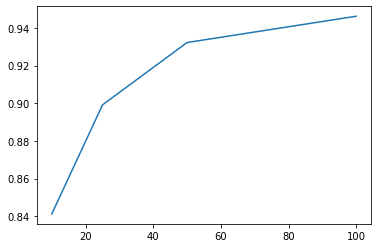

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error,confusion_matrix
nodes = [10,25,50,100]
accuracy =[]
for node in nodes:    
    model = DecisionTreeClassifier(random_state=1,max_leaf_nodes=node)
    model.fit(X_train,Y_train)
    preds = model.predict(X_test)
    accs = accuracy_score(Y_test,preds.round())
    accuracy.append(accs)
    print(confusion_matrix(Y_test,preds.round()),'Nodes: ', node,accs)
# print(accuracy)
sns.lineplot(x=nodes,y=accuracy)

[[963  13]
 [ 47 911]] No of Estimators:  10 0.9689762150982419
[[962  14]
 [ 45 913]] No of Estimators:  15 0.9694932781799379
[[964  12]
 [ 46 912]] No of Estimators:  20 0.9700103412616339
[[966  10]
 [ 46 912]] No of Estimators:  25 0.9710444674250258
[[966  10]
 [ 47 911]] No of Estimators:  50 0.9705274043433298
[[966  10]
 [ 47 911]] No of Estimators:  100 0.9705274043433298


<AxesSubplot:>

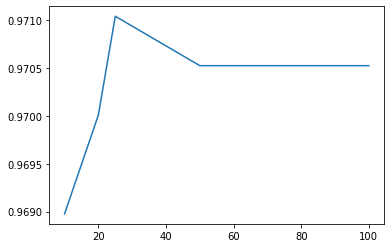

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error
nodes = [10,15,20,25,50,100]
accuracy =[]
for node in nodes:    
    model = RandomForestClassifier(criterion = 'entropy', random_state=0, n_estimators=node)
    model.fit(X_train,Y_train.values.ravel())
    preds = model.predict(X_test)
    accs = accuracy_score(Y_test,preds.round())
    accuracy.append(accs)
    print(confusion_matrix(Y_test,preds.round()),'No of Estimators: ', node,accs)

sns.lineplot(x=nodes,y=accuracy)

[[813 163]
 [ 10 948]] No of Neighbors:  5 0.9105480868665977
[[796 180]
 [ 20 938]] No of Neighbors:  10 0.8965873836608066
[[730 246]
 [ 25 933]] No of Neighbors:  15 0.859875904860393
[[714 262]
 [ 31 927]] No of Neighbors:  20 0.8485005170630817
[[685 291]
 [ 28 930]] No of Neighbors:  25 0.8350568769389866
[[672 304]
 [ 51 907]] No of Neighbors:  50 0.8164426059979317
[[599 377]
 [ 53 905]] No of Neighbors:  100 0.7776628748707343


<AxesSubplot:>

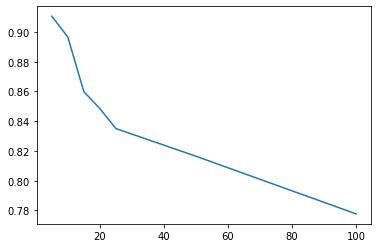

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error
nodes = [5,10,15,20,25,50,100]
accuracy =[]
for node in nodes:    
    classifier = KNeighborsClassifier(n_neighbors = node, metric = 'minkowski',p=2)
    classifier.fit(X_train,Y_train.values.ravel())
    preds = classifier.predict(X_test)
    accs = accuracy_score(Y_test,preds.round())
    accuracy.append(accs)
    print(confusion_matrix(Y_test,preds),'No of Neighbors: ', node,accs)

sns.lineplot(x=nodes,y=accuracy)



In [ ]:
import tensorflow as tf

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units=1))
ann.compile(loss = 'mean_squared_error' , optimizer = 'adam')
ann.fit(X_train, Y_train, batch_size = 32, epochs = 100)
y_pred = ann.predict(X_test)
accs = accuracy_score(Y_test,y_pred.round())
print(confusion_matrix(Y_test,y_pred.round()),accs)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

242/242 [==============================] - 0s 2ms/step - loss: 0.1970
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.1581
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.1498
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.1465
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.1444
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.1429
Epoch 7/100
242/

In [ ]:
from xgboost import XGBClassifier   #XGBRegressor for Regression
classifier = XGBClassifier()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)